In [1]:
import math
import numpy as np
import pandas as pd
import scipy as sp
from dateutil import parser, rrule
from datetime import datetime, time, date
import scipy.linalg
import csv
from matplotlib import pyplot as plt
import cmath

In [2]:
#task 1
N = 500
h = 0.05
def model_series():
    return np.array([sum([(k * np.exp(-h * i / k) * np.cos(4 * np.pi * k * h * i + np.pi / k)) for k in range(1, 4)]) for i in range(1, N + 1)])


In [3]:
def prony(x: np.array, T: float):
    if len(x) % 2 == 1:
        x = x[:len(x)-1]

    p = len(x) // 2

    shift_x = [0] + list(x)
    a = scipy.linalg.solve([shift_x[p+i:i:-1] for i in range(p)], -x[p::])

    z = np.roots([*a[::-1], 1])

    h = scipy.linalg.solve([z**n for n in range(1, p + 1)], x[:p])

    f = 1 / (2 * np.pi * T) * np.arctan(np.imag(z) / np.real(z))
    alfa = 1 / T * np.log(np.abs(z))
    A = np.abs(h)
    fi = np.arctan(np.imag(h) / np.real(h))

    return f, alfa, A, fi


/tmp/ipykernel_58985/313258217.py:8: LinAlgWarning: Ill-conditioned matrix (rcond=3.45647e-20): result may not be accurate.
  a = scipy.linalg.solve([shift_x[p+i:i:-1] for i in range(p)], -x[p::])
/tmp/ipykernel_58985/313258217.py:12: LinAlgWarning: Ill-conditioned matrix (rcond=2.37727e-56): result may not be accurate.
  h = scipy.linalg.solve([z**n for n in range(1, p + 1)], x[:p])


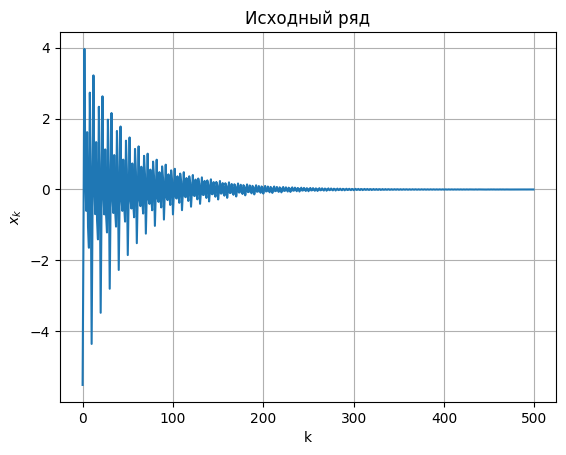

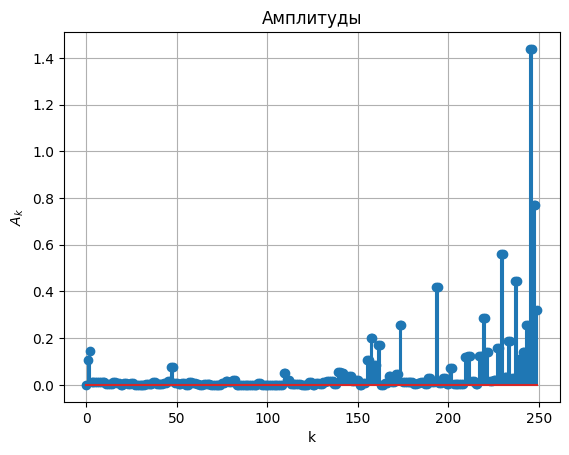

In [4]:
#task 1
series = model_series()
plt.figure()
plt.title("Исходный ряд")
plt.plot(series)

plt.grid()
plt.xlabel("k")
plt.ylabel("$x_k$")

f, alfa, A, fi = prony(series, 0.1)
plt.figure()
plt.stem(A)
plt.plot()
plt.grid()
plt.xlabel("k")
plt.ylabel("$A_k$")
plt.title("Амплитуды")
plt.show()



In [5]:
def ema(data, a):
    y = []
    y.append((data[0] + data[1])/2)
    for i in range(1, len(data)):
        y.append(a*data[i] + (1-a)*y[i-1])
    return y

def sma(data, m):
    sma = [0] * len(data)
    sma[0] = data[0]
    for i in range(1, len(data)-1):
        w = m
        while (i - w < 0) or (i + w > len(data) - 1):
            w -= 1
        sma[i] = sum(data[i-w:i+w]) / (2*w+1)
    sma[-1] = data[-1]
    return sma

def rotation_points(series:np.array):
    res = []
    for i in range(1, len(series) - 2):
        if (series[i] > series[i - 1] and series[i] > series[i + 1]) or (series[i] < series[i - 1] and series[i] < series[i + 1]):
            res.append(series[i])
    return res

def kendall(series:np.array, trend:np.array):
    tail = series - trend
    r_p = rotation_points(tail)
    p_e = (2.0 / 3.0) * (len(series) - 2)
    p_d = (16 * len(series) - 29) / 90.0
    p_c = len(r_p)
    
    print('rotation points count: ', p_c)
    print('Kendall coefficient: ', (4 * p_c) / (N * (N - 1)) - 1)

    if p_c < p_e + p_d and p_c > p_e - p_d:
        print("random\n")
    elif p_c > p_e + p_d:
        print("rapidly oscillating\n")
    elif p_c < p_e - p_d:
        print("positively correlated\n")


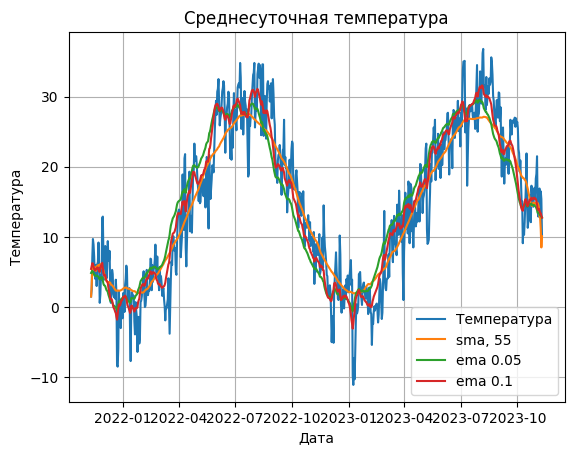

Главная частота = 0.0027548209366391185


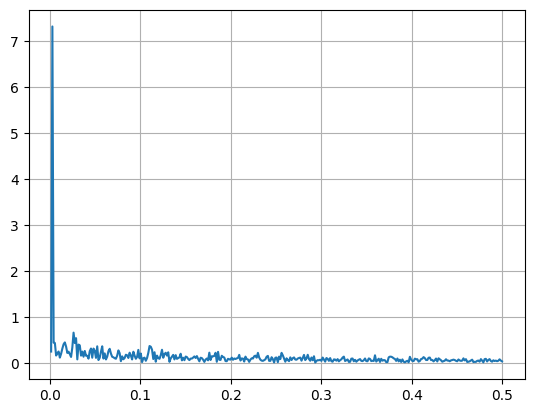

In [6]:
df = pd.read_csv('taganrog.csv', parse_dates=['time'], dayfirst=True)
date_list = df['time'].tolist()
temp_list = df['temp'].tolist()
plt.plot(date_list, temp_list, label = 'Температура')

sma_trend = sma(np.array(temp_list), 55)
ema005_trend = ema(np.array(temp_list), 0.05)
ema01_trend = ema(np.array(temp_list), 0.1)

plt.plot(date_list, sma_trend, label = 'sma, 55')
plt.plot(date_list, ema005_trend, label = 'ema 0.05')
plt.plot(date_list, ema01_trend, label = 'ema 0.1')

plt.xlabel("Дата")
plt.ylabel("Температура")
plt.title("Среднесуточная температура")
plt.grid()
plt.legend()
plt.show()


f = np.fft.fft(series)
f = np.abs(f[:len(series) // 2])
freqs = np.linspace(0, 1 / (2.0), len(series) // 2)
freq = freqs[np.argmax(f)]

FFT_orig = np.fft.fft(np.array(temp_list))
FFT_orig = abs(np.fft.fft(np.array(temp_list)))

ordi = np.linspace(0, 0.5, len(FFT_orig)//2)

print(f"Главная частота = {ordi[np.argmax(FFT_orig[1:len(FFT_orig)//2])+1]}")
plt.figure()
plt.plot(ordi[1:], FFT_orig[1:len(FFT_orig)//2]/len(FFT_orig), label='FFT(x)')
plt.grid()
plt.show()

In [7]:
print("kendall sma 55")
kendall(np.array(temp_list), np.array(sma_trend))
print("kendall exp 0.05")
kendall(np.array(temp_list), np.array(ema005_trend))
print("kendall exp 0.1")
kendall(np.array(temp_list), np.array(ema01_trend))


kendall sma 55
rotation points count:  375
Kendall coefficient:  -0.9939879759519038
random

kendall exp 0.05
rotation points count:  375
Kendall coefficient:  -0.9939879759519038
random

kendall exp 0.1
rotation points count:  383
Kendall coefficient:  -0.9938597194388777
random

